# K-Means Clustering for Sections

In [121]:
import re
import glob
import string

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.externals import joblib

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

In [122]:
list_of_dfs = []

for f in glob.glob('sections/*.csv'):
    list_of_dfs.append(pd.read_csv(f, encoding='utf-8-sig'))

In [123]:
list_of_dfs[0]

,country,iso,gdp,population,year,tariff_f,duty_f,quota_f,voluntary_restraint_f,subsidy_f,...,copyright_lf,countervailing_lf,unfair_lf,fair_trade_lf,trade_facilitation_lf,section_number,section_name,words,paragraphs,text
0,guyana,GUY,3.446266e+09,773303.0,2015,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,132,4,"['3.2.1 Export documentation and procedures',..."
1,hong_kong_china,HKG,3.210000e+11,7346700.0,2014,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,203,2,"['3.3.1 Export documents and procedures', '3...."


In [124]:
#doc list with section tag
section_text = []
section_names = []

translator = str.maketrans('', '', string.punctuation)

for df in list_of_dfs:
    text = ' '.join(list(df['text'].values))
    
    s = re.sub(r'\d+', '', text)
    ns = s.translate(translator)
    
    section_text.append(' '.join(ns.split()).lower())
    section_names.append(df['section_name'].values[0])

In [125]:
print((section_names[0], section_text[0]))

('export documentation and procedures', 'export documentation and procedures procedures applied to exports are similar to those applied to imports exporters must register with the gra predeparture declarations for exports must be submitted to the gra with the operation of the risk management unit in not all exports are subject to physical inspection except exports to the united states and the united kingdom the presence of a customs officer at exporters premises when containers are loaded is no longer necessary export containers are subject to scanning based on risk profiling when necessary physical inspections are conducted on consignments that are deemed to have high risks implementations of risk profiling have reportedly reduced inspections of shipments there are some additional measures applied to exports of forestry products section there are also facilitation measures provided for exports of perishable goods export documents and procedures an export declaration must be lodged ele

In [126]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text)

In [127]:
tfidf_matrix.shape

(254, 23969)

In [128]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ -2.22044605e-16,   6.78987591e-01,   6.31104700e-01, ...,
          6.43775253e-01,   7.15299864e-01,   6.21476217e-01],
       [  6.78987591e-01,   0.00000000e+00,   6.35851126e-01, ...,
          5.71018456e-01,   6.70875728e-01,   5.38523141e-01],
       [  6.31104700e-01,   6.35851126e-01,  -2.22044605e-16, ...,
          5.60234044e-01,   7.14616340e-01,   6.30806583e-01],
       ..., 
       [  6.43775253e-01,   5.71018456e-01,   5.60234044e-01, ...,
          1.11022302e-16,   6.41397524e-01,   5.46563524e-01],
       [  7.15299864e-01,   6.70875728e-01,   7.14616340e-01, ...,
          6.41397524e-01,  -2.22044605e-16,   6.50818362e-01],
       [  6.21476217e-01,   5.38523141e-01,   6.30806583e-01, ...,
          5.46563524e-01,   6.50818362e-01,  -2.22044605e-16]])

>Change "num_clusters" below to designated number.

In [129]:
num_clusters = 12

km = KMeans(n_clusters=num_clusters, random_state=2)
#km = GaussianMixture(n_components=1)

%time km.fit(tfidf_matrix.toarray())

CPU times: user 6.12 s, sys: 648 ms, total: 6.77 s
Wall time: 6.91 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [130]:
clusters = km.labels_.tolist()

In [131]:
sections_dict = {'section_names' : section_names, 'clusters' : clusters}
df = pd.DataFrame(sections_dict, index=[i for i in range(len(clusters))], columns=['section_names', 'clusters'])

In [132]:
df

,section_names,clusters
0,export documentation and procedures,3
1,other charges,0
2,export incentives,0
3,registration customs documents and procedures,3
4,customs procedures and valuation,3
5,export prohibitions authorizations and licensing,6
6,export subsidies promotion and assistance,3
7,prohibitions licensing and controls,6
8,tariffs and other charges affecting imports,0
9,export duty drawback,0


In [133]:
#Note: line directly below is used in visualization only
cluster_samples = {}

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

c_counter = 0
names = list(df['section_names'].values)
clus = list(df['clusters'].values)

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    
    s_list = []
    
    for c in range(len(clus)):
        if clus[c] == i:
            print(' %s,' % names[c], end='')
            s_list.append(names[c])
        
    cluster_samples[c_counter] = s_list[:2]
    c_counter+=1
            
    print('\n')

Cluster 0: other charges, export incentives, tariffs and other charges affecting imports, export duty drawback, export procedures taxes and restrictions, export procedures taxes and levies, export subsidies and inward processing, export processing zones, marking labelling and packaging, customs levies, procedures export taxes and restrictions, internal taxes affecting imports, other duties and charges, goods in transit, export taxes and duties, other taxes, regional development programmes, export-processing zones, internal taxes, technological industrial development zones, other taxes and charges, taxes charges and levies, export duties charges and levies, tax, state trading enterprises, export taxes charges and levies, export taxes and charges, legal framework for businesses registration and licensing, application of internal taxes, incorporation of companies and their tax regime, taxes and other export levies, export operations of state enterprises monopolies, levies at the border, e

In [134]:
cluster_samples

{0: ['other charges', 'export incentives'],
 1: ['export subsidies and incentives',
  'incentives subsidies and other government assistance'],
 2: ['technical regulations and standards',
  'standards technical requirements and conformity assessment'],
 3: ['export documentation and procedures',
  'registration customs documents and procedures'],
 4: ['export control', 'export subsidies and other tax benefits'],
 5: ['export subsidies and duty and tax concessions', 'tariff quotas'],
 6: ['export prohibitions authorizations and licensing',
  'prohibitions licensing and controls'],
 7: ['consumer policy and protection'],
 8: ['import licensing quotas and prohibitions', 'import controls'],
 9: ['non-tax incentives and other assistances',
  'foreign investment location incentives'],
 10: ['tariffs and excise duties', 'tariffs'],
 11: ['state trading state-owned enterprises and privatization',
  'competition policy state aid consumer protection and price controls']}

# Visualization

>**NOTE:** We only have 22 colors -- add more if # clusters > 22.

In [135]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
points = pca.fit_transform(dist)

xs, ys = points[:, 0], points[:, 1]

In [138]:
possible_colors = ['#FA5858', '#B40404', '#610B0B', '#FAAC58', '#DF7401', '#FFFF00',
                   '#AEB404', '#BFFF00', '#86B404', '#80FF00', '#58FAF4', '#086A87',
                   '#2E64FE', '#0404B4', '#8258FA', '#4B088A', '#FF00FF', '#B4045F',
                   '#FA58D0', '#A4A4A4', '#000000', '#886A08']
 
#names are the dict from above: cluster_samples
cluster_colors = {}

prev_picks = []
counter = 0
while len(cluster_colors) < num_clusters:
    pick_random = random.randint(a=0, b=len(possible_colors)-1)
    if pick_random not in prev_picks:
        cluster_colors[counter] = possible_colors[pick_random]
        prev_picks.append(pick_random)
        counter += 1

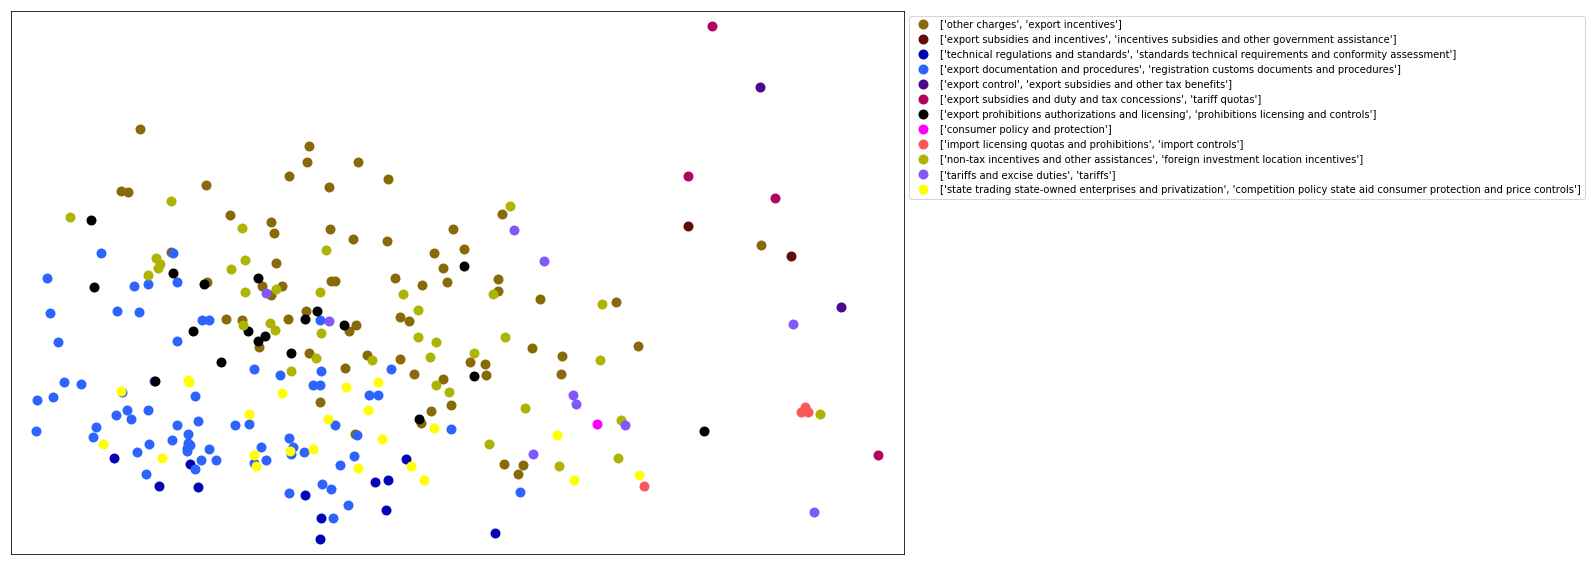

In [139]:
%matplotlib inline 
df_vals = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=section_names)) 
groups = df_vals.groupby('label')

fig, ax = plt.subplots(figsize=(16, 10))
ax.margins(0.03)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_samples[name], color=cluster_colors[name], mec='none')
    
    ax.set_aspect('auto')
    ax.tick_params(bottom='off', top='off', labelbottom='off')
    ax.tick_params(left='off', top='off', labelleft='off')
    
plt.legend(bbox_to_anchor=(1, 1))
    
plt.show()